### Import EDA Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import "MPG" Data From Seaborn 

In [45]:
mpg = sns.load_dataset("mpg")

In [46]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [47]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Exploratory Data Analysis 

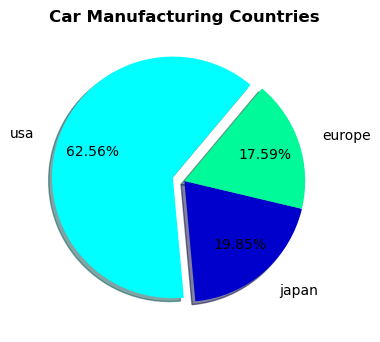

In [48]:
plt.figure(dpi=100)
origin = mpg['origin'].value_counts()
color = ['aqua', 'mediumblue', 'mediumspringgreen']
l = mpg['origin'].unique()
plt.pie(origin, labels=l, explode=[0.1,0,0], startangle=50, colors=color, shadow=True, autopct='%.2f%%',
        labeldistance=1.2, pctdistance=0.7)
plt.title("Car Manufacturing Countries", fontweight='bold')
plt.show()

In [49]:
mpg.groupby('origin')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [50]:
mpg.groupby('model_year')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,29.0,17.689655,5.339231,9.0,14.000,16.00,22.000,27.0
71,28.0,21.250000,6.591942,12.0,15.500,19.00,27.000,35.0
72,28.0,18.714286,5.435529,11.0,13.750,18.50,23.000,28.0
73,40.0,17.100000,4.700245,11.0,13.000,16.00,20.000,29.0
74,27.0,22.703704,6.420010,13.0,16.000,24.00,27.000,32.0
75,30.0,20.266667,4.940566,13.0,16.000,19.50,23.000,33.0
76,34.0,21.573529,5.889297,13.0,16.750,21.00,26.375,33.0
77,28.0,23.375000,6.675862,15.0,17.375,21.75,30.000,36.0
78,36.0,24.061111,6.898044,16.2,19.350,20.70,28.000,43.1


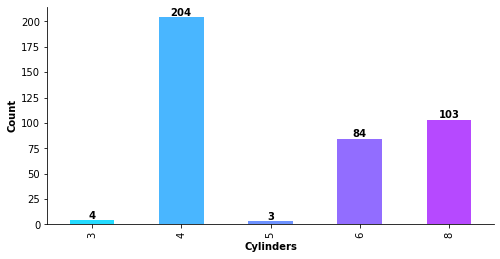

In [51]:
plt.figure(figsize=(8,4))
col = sns.color_palette('cool')
cyl = mpg.groupby('cylinders')['cylinders'].count().plot(kind='bar', color=col)
plt.xlabel('Cylinders', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for container in cyl.containers:
    cyl.bar_label(container, fontsize=10, fontweight='bold')

In [52]:
des = mpg.groupby('cylinders')['mpg'].describe()
t = des.style.background_gradient(cmap='summer_r')
t

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.000000,20.550000,2.564501,18.000000,18.750000,20.250000,22.050000,23.700000
4,204.000000,29.286765,5.710156,18.000000,25.000000,28.250000,33.000000,46.600000
5,3.000000,27.366667,8.228204,20.300000,22.850000,25.400000,30.900000,36.400000
6,84.000000,19.985714,3.807322,15.000000,18.000000,19.000000,21.000000,38.000000
8,103.000000,14.963107,2.836284,9.000000,13.000000,14.000000,16.000000,26.600000


In [53]:
average = mpg.groupby('cylinders')[['horsepower','mpg','displacement','weight', 'acceleration']].mean().round(2)
table = average.style.background_gradient(cmap='PuBu')
table

,horsepower,mpg,displacement,weight,acceleration
cylinders,,,,,
3,99.250000,20.550000,72.500000,2398.500000,13.250000
4,78.280000,29.290000,109.800000,2308.130000,16.600000
5,82.330000,27.370000,145.000000,3103.330000,18.630000
6,101.510000,19.990000,218.140000,3198.230000,16.260000
8,158.300000,14.960000,345.010000,4114.720000,12.960000


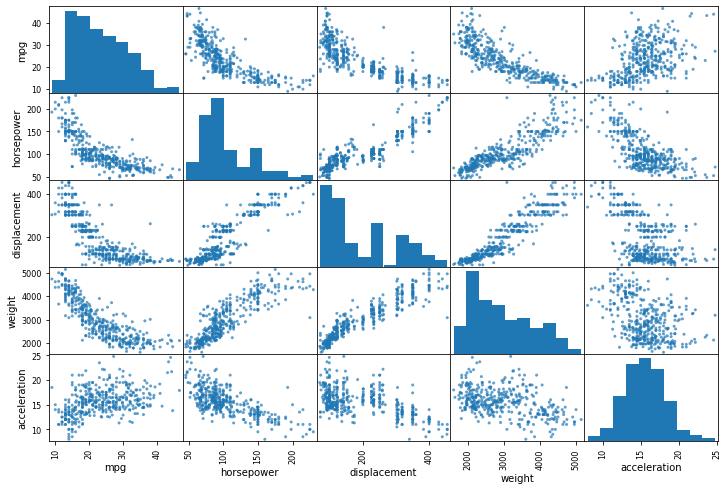

In [54]:
from pandas.plotting import scatter_matrix
attributes = ['mpg', 'horsepower', 'displacement', 'weight', 'acceleration']
scatter_matrix(mpg[attributes], figsize=(12,8), alpha=0.7, marker='.')
plt.show()

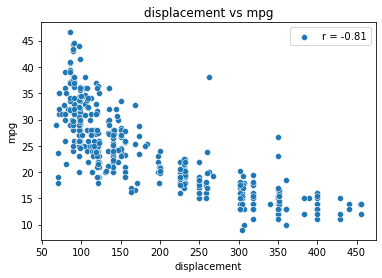

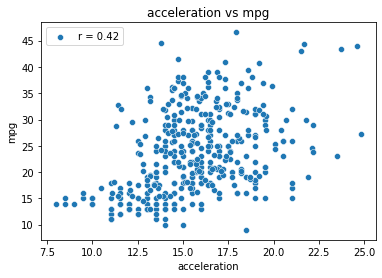

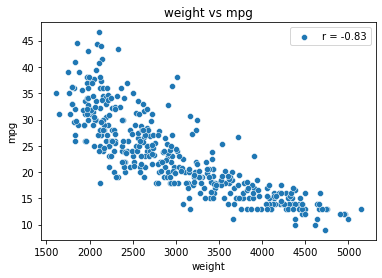

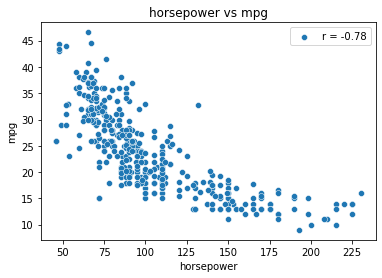

In [55]:
features = ['displacement', 'acceleration', 'weight', 'horsepower']

for X in features:
    plt.title(f"{X} vs mpg")
    r = round(np.corrcoef(mpg.dropna()[X], mpg.dropna()['mpg'])[0, 1], 2)
    sns.scatterplot(data=mpg, x=X, y='mpg', label=f"r = {r:0.2f}")
    plt.legend()
    plt.show()

### Custom Transformer

In [56]:
from sklearn.base import TransformerMixin, BaseEstimator

In [57]:
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
        self.out_column = "company"
    def fit(self, X, y=None):
        # X -> DataFrame 
        return self
    def transform(self, X, y=None):
        X[self.out_column] = X[self.in_column].str.split(" ", expand=True)[0]
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y) # parameter 
        return self.transform(X, y) # act to transform
        

In [58]:
fd = FeatureAdder()
mpg_tr = fd.fit_transform(mpg)
mpg_tr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [59]:
## mpg['company'] = mpg['name'].str.split(" ", expand=True)[0]

In [60]:
mpg['company'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [61]:
mpg['company'].nunique()

37

In [62]:
mpg.groupby('company')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
company,,,,,,,,
amc,28.0,18.246429,3.299325,13.0,15.875,18.00,19.550,27.4
audi,7.0,26.714286,6.632855,20.0,21.650,24.00,31.650,36.4
bmw,2.0,23.750000,3.181981,21.5,22.625,23.75,24.875,26.0
buick,17.0,19.182353,5.760993,12.0,14.000,17.70,22.400,30.0
cadillac,2.0,19.750000,4.596194,16.5,18.125,19.75,21.375,23.0
capri,1.0,25.000000,NaN,25.0,25.000,25.00,25.000,25.0
chevroelt,1.0,16.000000,NaN,16.0,16.000,16.00,16.000,16.0
chevrolet,43.0,20.472093,6.182823,11.0,15.250,19.20,26.000,34.0
chevy,3.0,18.000000,11.357817,10.0,11.500,13.00,22.000,31.0


In [63]:
mpg['company'] = mpg['company'].str.replace("toyouta", "toyota", regex=False)
mpg['company'] = mpg['company'].str.replace("vokswagen", "volkswagen", regex=False)
mpg['company'] = mpg['company'].str.replace("vw", "volkswagen", regex=False)
mpg['company'] = mpg['company'].str.replace("maxda", "mazda", regex=False)
mpg['company'] = mpg['company'].str.replace("chevroelt", "chevrolet", regex=False)
mpg['company'] = mpg['company'].str.replace("chevy", "chevrolet", regex=False)

In [64]:
mpg['company'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes-benz', 'cadillac', 'mercedes', 'triumph',
       'nissan'], dtype=object)

In [65]:
mpg['company'].nunique()

31

In [66]:
mpg = mpg.drop('name', axis=1 )

In [67]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford


In [68]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
company         0
dtype: int64

#### Evaluation Metrices

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def rmse(y, y_hat):
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)

### Data Sampling

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = mpg.drop("mpg", axis=1)
y = mpg["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)

### Transformer and Data Pipeline

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [73]:
num_features = ["displacement", "horsepower", "weight", "acceleration"] 
nominal_columns = ["origin"] 
ordinal_columns = ["company", "model_year", "cylinders"] 

In [74]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
]) 

In [75]:
cat_pipeline = Pipeline([
    ("ordinal encoder", OrdinalEncoder())
])

In [76]:
pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features),  
    ("nominal transformer", OneHotEncoder(), nominal_columns), 
    ("ordinal transformer", cat_pipeline, ordinal_columns) ])

In [77]:
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)

### Funtion to Dry Run Various Estimators (ML Models) for Model Selection

In [78]:
def train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test):
    result = {"Model Name": [], "Train Accuracy": [], "Test Accuracy": [],
             "Train Error": [], "Test Error": []}
    
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        tr_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        ts_acc = round(r2_score(y_test, y_hat_test)*100, 2)
        tr_err = round(rmse(y_train, y_hat_train), 2)
        ts_err = round(rmse(y_test, y_hat_test), 2)
        result["Model Name"].append(model)
        result["Train Accuracy"].append(tr_acc)
        result["Test Accuracy"].append(ts_acc)
        result["Train Error"].append(tr_err)
        result["Test Error"].append(ts_err)
        
    return pd.DataFrame(result)

### Selecting Various ML Models to Train

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [80]:
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

In [81]:
result = train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test)
result.index = [var for var in range(1,6)]

In [82]:
result

,Model Name,Train Accuracy,Test Accuracy,Train Error,Test Error
1,LinearRegression(),82.58,85.94,3.24,3.03
2,SGDRegressor(),82.30,84.93,3.27,3.14
3,DecisionTreeRegressor(),100.00,60.40,0.00,5.09
4,SVR(),82.25,84.10,3.27,3.22
5,"(DecisionTreeRegressor(max_features='auto', ra...",98.25,86.05,1.03,3.02


### Hyper-parameter Tuning

In [83]:
models = []

for n_est in [10, 50, 100]:
    for depth in [3, 5, 7]:
        for max_fth in [2, 4, 6, 8]:
            models.append(RandomForestRegressor(n_estimators=n_est,
                                               max_depth=depth,
                                               max_features=max_fth))

In [84]:
df = train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test)
df

,Model Name,Train Accuracy,Test Accuracy,Train Error,Test Error
0,"(DecisionTreeRegressor(max_depth=3, max_featur...",82.17,84.09,3.28,3.23
1,"(DecisionTreeRegressor(max_depth=3, max_featur...",86.42,86.29,2.86,2.99
2,"(DecisionTreeRegressor(max_depth=3, max_featur...",86.93,85.32,2.81,3.10
3,"(DecisionTreeRegressor(max_depth=3, max_featur...",87.28,87.23,2.77,2.89
4,"(DecisionTreeRegressor(max_depth=5, max_featur...",90.65,87.34,2.38,2.88
5,"(DecisionTreeRegressor(max_depth=5, max_featur...",91.83,86.38,2.22,2.98
6,"(DecisionTreeRegressor(max_depth=5, max_featur...",93.60,85.09,1.97,3.12
7,"(DecisionTreeRegressor(max_depth=5, max_featur...",93.51,86.90,1.98,2.93
8,"(DecisionTreeRegressor(max_depth=7, max_featur...",94.70,84.89,1.79,3.14
9,"(DecisionTreeRegressor(max_depth=7, max_featur...",95.18,84.99,1.71,3.13


### Best Estimator

In [85]:
mx = df['Test Accuracy'].argmax()
mx

20

In [86]:
df.iloc[mx:mx+1]

,Model Name,Train Accuracy,Test Accuracy,Train Error,Test Error
20,"(DecisionTreeRegressor(max_depth=7, max_featur...",95.13,90.03,1.72,2.55
